# This notebook will tell you how many OGs of interest have specific patterns of family members (ie High > Low or Medium > High)

In [15]:
import csv
import pandas as pd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
import statsmodels.tools.print_version

 ## Open the file that is a single column of all the OGs of interest and save them as a list 

In [2]:
with open("10K_adj05_OGs.txt", "r") as f:
    OGs = []
    for item in f:
        #needed to remove the carriage returns
        OGs.append(item[:-1])

 ## Load the OG data in as a dictionary with OGs as the keys and the number of family members in each strain (as an integer) as the values

In [3]:
# open the file and make an initial dictionary that has orthogroups as keys and all the gene numbers as values
#NOTE: this CSV file can NOT have a header
with open('../../only_changes.csv') as mainfilehandle:
    reader = csv.reader(mainfilehandle, delimiter=',')
    l = list(reader)
    d = {row[0]:row[1:] for row in l}

# make an empty dictionary that will eventually contain orthogroups and gene numbers as integers (and not strings)
dInt = {}

#for every key in the initial dictionary...
for k in d:
    
    #make a new key in the "integer" dictionary that is the key you're currently looping on
    dInt[k] = []
    
    #for every value with that key
    for v in d[k]:
        
        #convert the number to an integer
        new = int(v)
        
        #and append it into the "integer" dictionary
        dInt[k].append(new)

## Make a function called `tukey` that will count how many orthogroups meet a given criteria and print those orthogroups if desired

In [4]:
#'differences' is a list of booleans for the groups you want in the format of "[True, True, True]"
    #order should be 'high is different than low', 'high is different than medium', 'low is different than medium'
#'matches' is a boolean that says whether or not you want to print all the orthogroups that match your criteria
    #default for matches is set to True
def tukey(differences, matches = True):
    
    #make a counting variable that will contain how many orthogroups met your criteria
    total = 0
    
    #make a list that contains the pathogenicity info
    pathogenicity = ['high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'low', \
                 'low', 'low', 'low', 'low', 'low', 'low', 'low']
    
    #make a list that is the strain names
    strain = ['A_neoellipticus_NRRL5109', 'A_fumigatus_12-750544', 'A_fumigatus_A1163', 'A_fumigatus_Af293', \
              'A_fumigatus_F16311', 'A_lentulus_IFM54703', 'A_novofumigatus_IBT16806', 'A_udagawae_IFM46973', \
              'A_viridinutans_FRR_0576', 'A_thermomutatus_HMRAF39', 'A_cejpii_FS110', 'A_clavatus_NRRL1', \
              'A_cristatus_GZAAS20.1005', 'A_fischeri_NRRL181', 'A_glaucus_CBS516.65', 'A_turcosus_HMRAF1038', \
              'A_turcosus_HMRAF23', 'A_wentii_DTO134E9']
    
    #for every orthogroup in the dictionary that has the adjusted p-values that are less than 0.05...
    for orthogroup in OGs:
        #make a list of the number of genes in each species in the same order as the previous two lists 
        values = [dInt[orthogroup][1], dInt[orthogroup][5], dInt[orthogroup][6], dInt[orthogroup][7], dInt[orthogroup][8], \
          dInt[orthogroup][10], dInt[orthogroup][11], dInt[orthogroup][12], dInt[orthogroup][15], dInt[orthogroup][16], \
          dInt[orthogroup][0], dInt[orthogroup][2], dInt[orthogroup][3], dInt[orthogroup][4], dInt[orthogroup][9], \
          dInt[orthogroup][13], dInt[orthogroup][14], dInt[orthogroup][17]]
        
        #make a dataframe that is each list as a column
        dfOrthogroup = pd.DataFrame(list(zip(strain, values, pathogenicity)), columns = ['Strain', 'Gene_Count',\
                                                                                 'Pathogenicity_Level'])
        
        #run the THSDT on the dataframe
        mc = MultiComparison(dfOrthogroup['Gene_Count'], dfOrthogroup['Pathogenicity_Level']).tukeyhsd()
        
        #if the user has set "matches" to True,
        if matches:
            
            #and the result of the THSDT matches the user-provided list of booleans,
            if list(mc.reject) == differences:
                #increase the counter by 1
                total += 1
                #and print the orthogroup number you are currently on
                print(str(mc.reject) + orthogroup)
        
        #if the user has not set "matches" to True,
        else:
            #and the result of the THSDT matches the user-provided list of booleans,
            if list(mc.reject) == differences:
                #increase the counter by 1
                total += 1
    #print the total number of orthogroups that matched the user-provided criteria
    print(total)

 ## How many orthogroups have different numbers of genes in high, middle, and lowly pathogenic species?

In [5]:
tukey([True, True, True], True)

/Users/MattMead/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:1309: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/Users/MattMead/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:1309: RuntimeWarning: invalid value encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/Users/MattMead/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:1317: RuntimeWarning: invalid value encountered in greater
  reject = st_range > q_crit


0


## How many orthogroups have a different number of genes in highly pathogenic species, but the same number of genes in low and medium pathogenic species?

In [6]:
tukey([True, True, False], True)

[ True  True False]6997
[ True  True False]9444
[ True  True False]9445
[ True  True False]9446
[ True  True False]9447
[ True  True False]9448
[ True  True False]9449
[ True  True False]9450
[ True  True False]9451
[ True  True False]9453
[ True  True False]9455
[ True  True False]9456
[ True  True False]9457
[ True  True False]9458
[ True  True False]9459
[ True  True False]9460
[ True  True False]9462
[ True  True False]9463
[ True  True False]9464
[ True  True False]9467
[ True  True False]9468
[ True  True False]9469
[ True  True False]9470
[ True  True False]9471
[ True  True False]9472
[ True  True False]9473
[ True  True False]9475
[ True  True False]9476
[ True  True False]9478
[ True  True False]9479
[ True  True False]9480
[ True  True False]9481
[ True  True False]9482
[ True  True False]9483
[ True  True False]9484
[ True  True False]9485
[ True  True False]9486
[ True  True False]9489
[ True  True False]9491
[ True  True False]9492
[ True  True False]9493
[ True  True Fal

### Of these, how many have more genes in A. fumigatus

In [7]:
#make a counting variable that will contain how many orthogroups met your criteria
total = 0
    
#make a list that contains the pathogenicity info
pathogenicity = ['high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium', 'low', \
                 'low', 'low', 'low', 'low', 'low', 'low', 'low']
    
#make a list that is the strain names
strain = ['A_neoellipticus_NRRL5109', 'A_fumigatus_12-750544', 'A_fumigatus_A1163', 'A_fumigatus_Af293', \
          'A_fumigatus_F16311', 'A_lentulus_IFM54703', 'A_novofumigatus_IBT16806', 'A_udagawae_IFM46973', \
          'A_viridinutans_FRR_0576', 'A_thermomutatus_HMRAF39', 'A_cejpii_FS110', 'A_clavatus_NRRL1', \
          'A_cristatus_GZAAS20.1005', 'A_fischeri_NRRL181', 'A_glaucus_CBS516.65', 'A_turcosus_HMRAF1038', \
          'A_turcosus_HMRAF23', 'A_wentii_DTO134E9']
    
#for every orthogroup in the dictionary that has the adjusted p-values that are less than 0.05...
for orthogroup in OGs:
    #make a list of the number of genes in each species in the same order as the previous two lists 
    values = [dInt[orthogroup][1], dInt[orthogroup][5], dInt[orthogroup][6], dInt[orthogroup][7], dInt[orthogroup][8], \
        dInt[orthogroup][10], dInt[orthogroup][11], dInt[orthogroup][12], dInt[orthogroup][15], dInt[orthogroup][16], \
        dInt[orthogroup][0], dInt[orthogroup][2], dInt[orthogroup][3], dInt[orthogroup][4], dInt[orthogroup][9], \
        dInt[orthogroup][13], dInt[orthogroup][14], dInt[orthogroup][17]]
        
    #make a dataframe that is each list as a column
    dfOrthogroup = pd.DataFrame(list(zip(strain, values, pathogenicity)), columns = ['Strain', 'Gene_Count',\
                                                                                 'Pathogenicity_Level'])
        
    #run the THSDT on the dataframe
    mc = MultiComparison(dfOrthogroup['Gene_Count'], dfOrthogroup['Pathogenicity_Level']).tukeyhsd()
        
    #if the result of the THSDT matches the user-provided list of booleans,
    if list(mc.reject) == [True, True, False] and mc.meandiffs[0] < 0 and mc.meandiffs[1] < 0:
        #increase the counter by 1
        total += 1
        print(orthogroup)
        
#print the total number of orthogroups that matched the user-provided criteria
print(total)

9444
9445
9446
9447
9448
9449
9450
9451
9453
9455
9456
9457
9458
9459
9460
9462
9463
9464
9467
9468
9469
9470
9471
9472
9473
9475
9476
9478
9479
9480
9481
9482
9483
9484
9485
9486
9489
9491
9492
9493
9495
9496
9498
9499
9500
9501
9503
9504
9505
9506
9507
9509
9510
9511
9512
9513
9514
9517
9518
9519
9521
9523
9525
9526
9527
9528
9529
9530
9531
9532
9028
9050
72


 #### All but one, and the one that doesn't is 6997

## How many orthogroups have the same number of genes in "pathogenic" species (high and medium) but different number of genes in non-pathogenic species (low)

In [8]:
tukey([True, False, True], True)

[ True False  True]8249
1


#### 8249 has FEWER genes in pathogens (0) and more genes in non-pathogens (1)

## How many orthogroups have the same number of genes in highly and lowly pathogenic species but a different number of genes in medium-pathogenic species
### Don't know how to think about this group.

In [9]:
tukey([False, True, True], True)

[False  True  True]9562
[False  True  True]9570
[False  True  True]9572
[False  True  True]9575
[False  True  True]9581
[False  True  True]9585
[False  True  True]9586
[False  True  True]9588
[False  True  True]9091
9


## How many orthogroups have different numbers of genes in high and low species, but the same number of genes in high and medium and low and medium species?

In [10]:
tukey([True, False, False], True)

0


## How many orthogroups have different numbers of genes in high and medium species, but the same number of genes in high and low and low and medium species

In [11]:
tukey([False, True, False], True)

0


## How many orthogroups have different numbers of genes in low and medium species, but the same number of genes in high and low and high and medium species

In [12]:
tukey([False, False, True], True)

0


## How many orthogroups all have the same number of genes in them
### This number should be 0 since they all passed the ANOVA

In [13]:
tukey([False, False, False], False)

0


In [14]:
#orthogroup will be the only parameter
def dotplot(orthogroup):
    #make a list that is the pathogenicity levels of the species in the order that they will be in the dataframe
    pathogenicity = ['high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',\
                 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
    
    #make a list that is the strains
    strain = ['A_neoellipticus_NRRL5109', 'A_fumigatus_12-750544', 'A_fumigatus_A1163', 'A_fumigatus_Af293', \
              'A_fumigatus_F16311', 'A_lentulus_IFM54703', 'A_novofumigatus_IBT16806', 'A_udagawae_IFM46973', \
              'A_viridinutans_FRR_0576', 'A_thermomutatus_HMRAF39', 'A_cejpii_FS110', 'A_clavatus_NRRL1', \
              'A_cristatus_GZAAS20.1005', 'A_fischeri_NRRL181', 'A_glaucus_CBS516.65', 'A_turcosus_HMRAF1038', \
              'A_turcosus_HMRAF23', 'A_wentii_DTO134E9']
              
    
    #make a list of the gene counts in the same order as the pathogenicity list
    values = [dInt[orthogroup][1], dInt[orthogroup][5], dInt[orthogroup][6], dInt[orthogroup][7], dInt[orthogroup][8], \
          dInt[orthogroup][10], dInt[orthogroup][11], dInt[orthogroup][12], dInt[orthogroup][15], dInt[orthogroup][16], \
          dInt[orthogroup][0], dInt[orthogroup][2], dInt[orthogroup][3], dInt[orthogroup][4], dInt[orthogroup][9], \
              dInt[orthogroup][13], dInt[orthogroup][14], dInt[orthogroup][17]]

    #make a pandas dataframe with strain, Gene_Count, and a Pathogenicity_Level column
    df = pd.DataFrame(list(zip(strain, values, pathogenicity)), columns = ['Strain', 'Gene_Count','Pathogenicity_Level'])
    
    print(df)
    
    sns.swarmplot(x="Pathogenicity_Level", y="Gene_Count", data=df, size=10).set_title(orthogroup);

                      Strain  Gene_Count Pathogenicity_Level
0   A_neoellipticus_NRRL5109           0                high
1      A_fumigatus_12-750544           0                high
2          A_fumigatus_A1163           0                high
3          A_fumigatus_Af293           0                high
4         A_fumigatus_F16311           0                high
5        A_lentulus_IFM54703           1              medium
6   A_novofumigatus_IBT16806           1              medium
7        A_udagawae_IFM46973           1              medium
8    A_viridinutans_FRR_0576           2              medium
9    A_thermomutatus_HMRAF39           2              medium
10            A_cejpii_FS110           1                 low
11          A_clavatus_NRRL1           1                 low
12  A_cristatus_GZAAS20.1005           2                 low
13        A_fischeri_NRRL181           2                 low
14       A_glaucus_CBS516.65           2                 low
15      A_turcosus_HMRAF

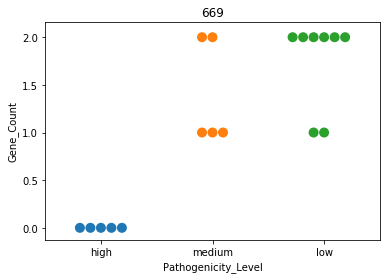

In [17]:
dotplot('669')

In [21]:
import statsmodels.api as sm 

In [22]:
sm.version.version 

AttributeError: module 'statsmodels.api' has no attribute 'version'

In [23]:
statsmodels.__version__ 

'0.10.0'